In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
from pyramid.arima import auto_arima

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alext234/coronavirus-stats/master/data/who-global-cases.csv',index_col=0)

In [3]:
del data['report_url']

In [4]:
data = data[~data.index.duplicated(keep='last')]

In [5]:
data.describe()

,global_cases
count,7.500000e+01
mean,3.016063e+05
std,4.218993e+05
min,2.798000e+03
25%,4.981650e+04
50%,9.309000e+04
75%,3.528435e+05
max,1.610909e+06


In [6]:
data.head()

,global_cases
date,
2020-01-27,2798
2020-01-28,4593
2020-01-29,6065
2020-01-30,7818
2020-01-31,9826


In [7]:
data.tail()

,global_cases
date,
2020-04-07,1279722
2020-04-08,1353361
2020-04-09,1436198
2020-04-10,1521252
2020-04-11,1610909


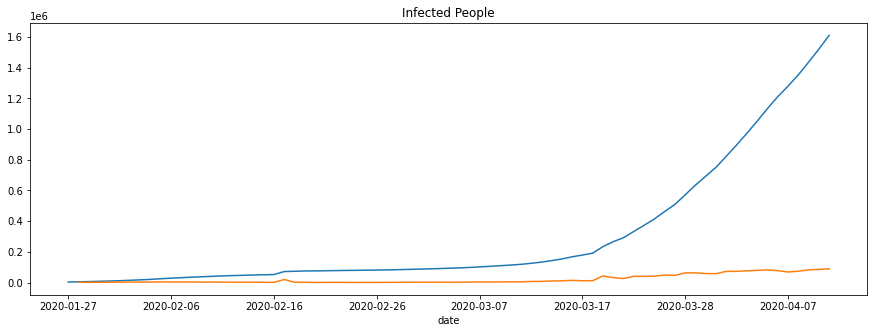

In [8]:
data.global_cases.plot(figsize=(15, 5), title='Infected People')
(data.global_cases - data.global_cases.shift(1)).plot(figsize=(15, 5))

In [9]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [10]:
stepwise_model = auto_arima(data.global_cases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1479.591, BIC=1493.334, Fit time=0.975 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1484.034, BIC=1488.615, Fit time=0.019 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1480.401, BIC=1487.272, Fit time=0.130 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1477.336, BIC=1484.207, Fit time=0.347 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1479.293, BIC=1488.455, Fit time=0.972 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1479.210, BIC=1488.372, Fit time=0.394 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1479.819, BIC=1491.271, Fit time=2.143 seconds
Total fit time: 5.038 seconds


In [11]:
stepwise_model.aic()

1477.3355959769683

In [12]:
stepwise_model.fit(data.global_cases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [13]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [14]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-04-12 - 1699956
2020-04-13 - 1790191
2020-04-14 - 1881612
2020-04-15 - 1974220
2020-04-16 - 2068014
